<a href="https://colab.research.google.com/github/a-gasior/DSA/blob/master/Feature_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_path = 'drive/My Drive/Data Solution Analyst Case Study/Data/cleaned_data/'

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns

In [3]:
x_discrete = pd.read_csv(data_path+'X_discrete.csv')
x_continuous = pd.read_csv(data_path+'X_continuous.csv')
y = pd.read_csv(data_path+'y_all.csv')

In [ ]:
y_pos = y.loc[(y['y'] == 1),:]
y_neg = y.loc[(y['y'] == 0),:]

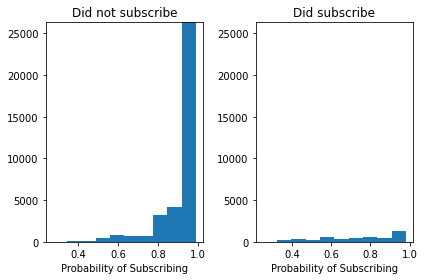

In [ ]:
fig1,((ax_neg, ax_pos)) = plt.subplots(1,2)

y1, x1, _  = ax_neg.hist(y_neg.loc[:,'ModelPrediction'])
y2, x2, _ = ax_pos.hist(y_pos.loc[:,'ModelPrediction'])

ultra_max = max(y1.max(),y2.max())

ax_neg.set_title('Did not subscribe')
ax_neg.set_xlabel('Probability of Subscribing')
ax_neg.set_ylim([0,ultra_max])

ax_pos.set_title('Did subscribe')
ax_pos.set_xlabel('Probability of Subscribing')
ax_pos.set_ylim([0,ultra_max])

fig1.tight_layout()

# fig1.savefig('drive/My Drive/Data Solution Analyst Case Study/images/model_prediction_histogram.png')

In [ ]:
x_continuous.drop('duration',axis=1,inplace=True)

In [ ]:
X = pd.concat([x_continuous,x_discrete],axis=1)
Y = y.loc[:,'y']

In [ ]:
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)

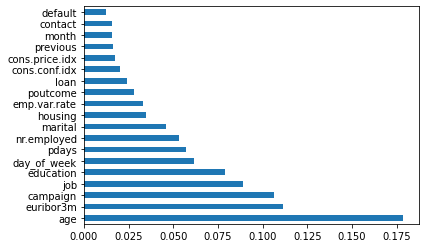

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(19).plot(kind='barh')
plt.show()

In [ ]:
df = pd.concat([X,y],axis=1)

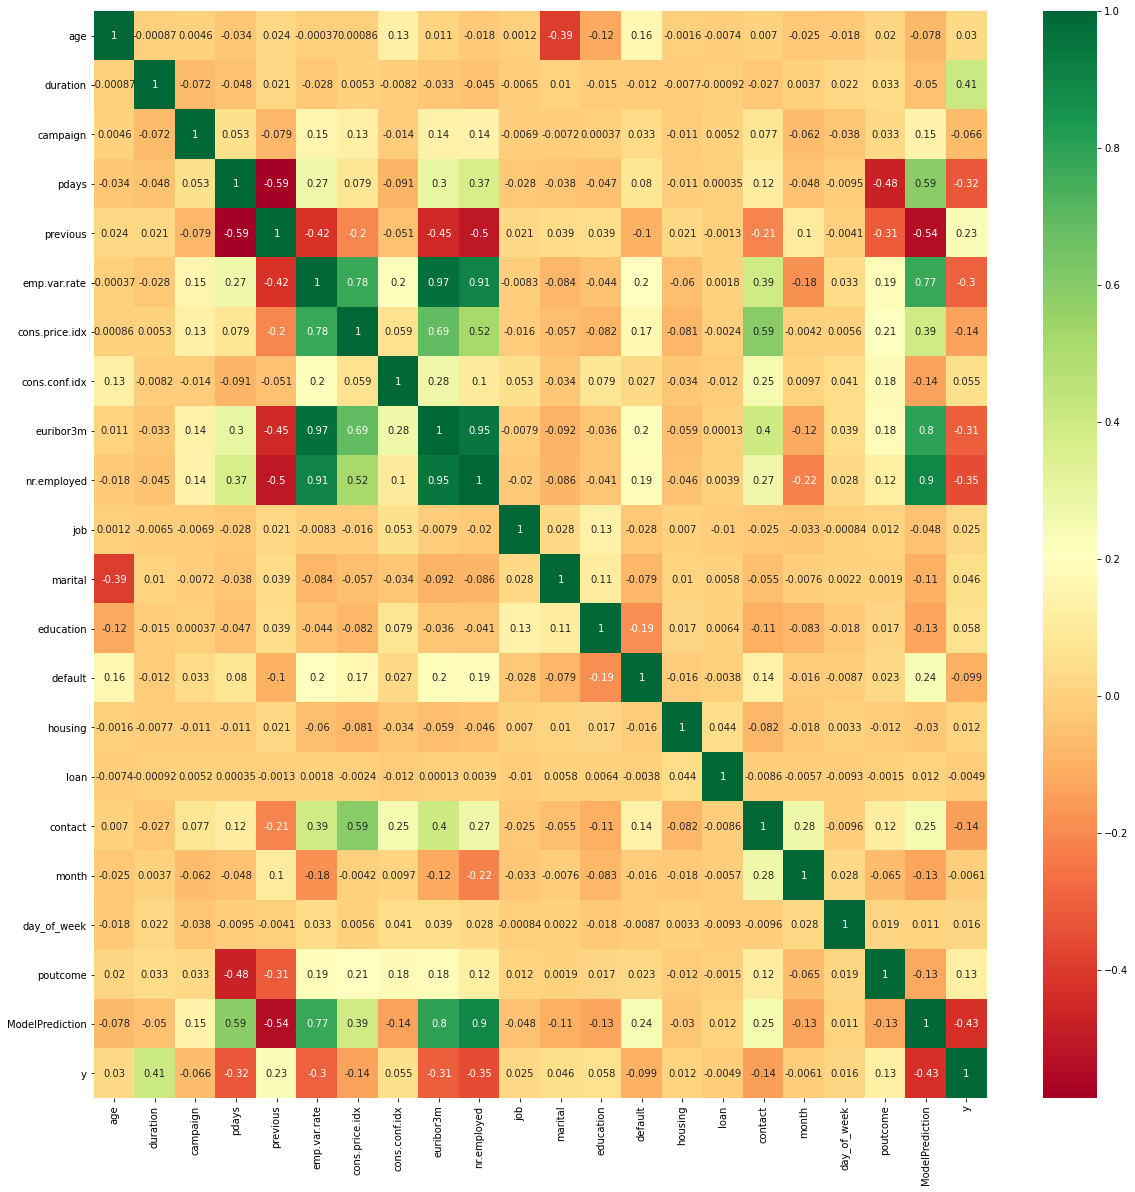

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index
fig2 = plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# One key assumption of multiple linear regression is that no independent variable in the model is highly correlated with another variable in the model. When two independent variables are highly correlated, this results in a problem known as multicollinearity and it can make it hard to interpret the results of the regression.

# One of the easiest ways to detect a potential multicollinearity problem is to look at a correlation matrix and visually check whether any of the variables are highly correlated with each other.

In [ ]:
fig2.savefig('drive/My Drive/Data Solution Analyst Case Study/images/correlation_matrix.png')

In [66]:
x_continuous.loc[:,'nr.employed'].describe()

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

In [5]:
x_discrete.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,3,1,0,0,0,0,1,6,1,1
1,7,1,3,1,0,0,1,6,1,1
2,7,1,3,0,2,0,1,6,1,1
3,0,1,1,0,0,0,1,6,1,1
4,7,1,3,0,0,2,1,6,1,1


In [6]:
y.head()

,ModelPrediction,y
0,0.932750,0
1,0.953579,0
2,0.945724,0
3,0.933875,0
4,0.940996,0


In [65]:
y.loc[:,'ModelPrediction'].describe()

count    41188.000000
mean         0.887597
std          0.125351
min          0.250174
25%          0.857484
50%          0.945879
75%          0.959214
max          0.988360
Name: ModelPrediction, dtype: float64

In [15]:
y.loc[:,['ModelPrediction']]

,ModelPrediction
0,0.932750
1,0.953579
2,0.945724
3,0.933875
4,0.940996
...,...
41183,0.567417
41184,0.655416
41185,0.574102
41186,0.615098


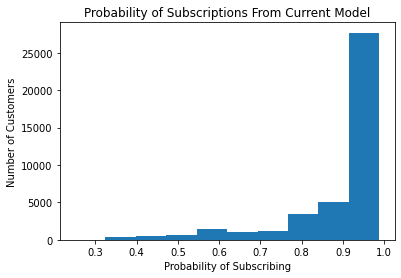

In [26]:
plt.hist(y.loc[:,'ModelPrediction'])
plt.xlabel('Probability of Subscribing')
plt.ylabel('Number of Customers')
plt.title('Probability of Subscriptions From Current Model')
plt.savefig('drive/My Drive/Data Solution Analyst Case Study/images/ProbCurrentModel.png')
plt.show()

In [39]:
x_whole = pd.concat([x_continuous,x_discrete],axis=1)
col_labels = x_whole.columns

In [35]:
y_cont = y.loc[:,['ModelPrediction']]
y_disc = y.loc[:,'y']

In [36]:
# labels = np.array(y_cont['ModelPrediction'])
mut_info = mutual_info_classif(x_whole,y_disc).reshape(1,-1)


In [43]:
df_mut = pd.DataFrame(mut_info,columns=col_labels)

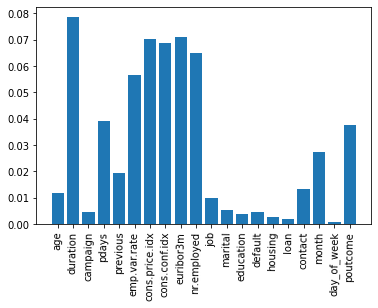

In [67]:
plt.bar(df_mut.columns,df_mut.values[0])
plt.xticks(rotation=89)
plt.savefig('drive/My Drive/Data Solution Analyst Case Study/images/MutualInforGain.png')
